In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('country_wise_latest.csv')

### EDA

In [5]:
df.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

C:\Users\SIZAN\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [11]:
df.shape

(187, 15)

In [12]:
df=df.rename(columns={'Country/Region':'country'})

In [13]:
df.columns

Index(['country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [14]:
region_confirmed=df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)

In [15]:
region_confirmed

WHO Region
Americas                 8839286
Europe                   3299523
South-East Asia          1835297
Eastern Mediterranean    1490744
Africa                    723207
Western Pacific           292428
Name: Confirmed, dtype: int64

In [16]:
x=df['WHO Region'].unique()

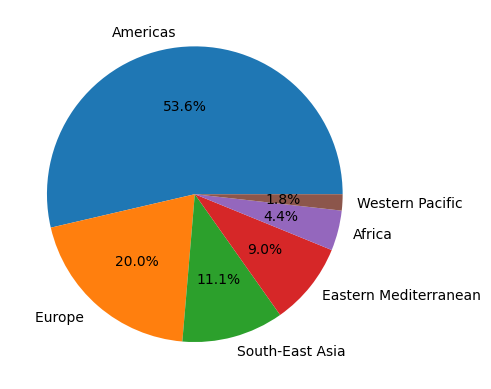

In [17]:
keys=["Americas","Europe ","South-East Asia","Eastern Mediterranean","Africa","Western Pacific "]

plt.pie(region_confirmed,labels=keys,autopct = '%1.1f%%',)
plt.show()

In [18]:
region_death=df.groupby('WHO Region')['Deaths'].sum().sort_values(ascending=True)

In [19]:
region_death

WHO Region
Western Pacific            8249
Africa                    12223
Eastern Mediterranean     38339
South-East Asia           41349
Europe                   211144
Americas                 342732
Name: Deaths, dtype: int64

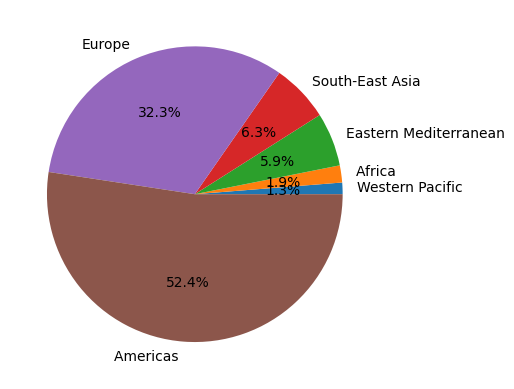

In [20]:
keys=['Western Pacific','Africa ','Eastern Mediterranean','South-East Asia','Europe','Americas ']
plt.pie(region_death,labels=keys,autopct='%1.1f%%')
plt.show()

In [21]:
region_recover=df.groupby('WHO Region')['Recovered'].sum().sort_values(ascending=True)

In [22]:
region_recover

WHO Region
Western Pacific           206770
Africa                    440645
South-East Asia          1156933
Eastern Mediterranean    1201400
Europe                   1993723
Americas                 4468616
Name: Recovered, dtype: int64

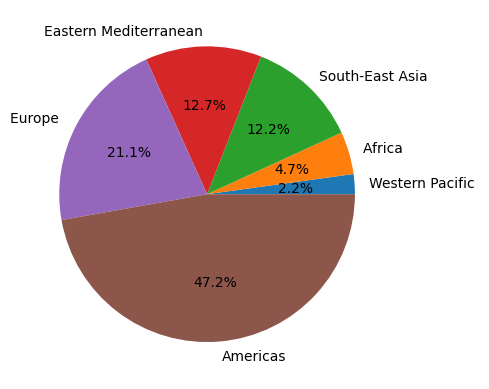

In [23]:
keys=["Western Pacific ","Africa ","South-East Asia","Eastern Mediterranean","Europe ","Americas"]
plt.pie(region_recover,labels=keys,autopct="%1.1f%%")
plt.show()


In [24]:
country_data = df.groupby('country').agg({'Confirmed': 'sum',
                                                'Deaths': 'sum',
                                                'Recovered': 'sum',
                                               'Active':'sum',
                                               'New cases':'sum',
                                               'New deaths':'sum',
                                               'New recovered':'sum'}).reset_index()

In [25]:
country_data.head(5)

,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,Afghanistan,36263,1269,25198,9796,106,10,18
1,Albania,4880,144,2745,1991,117,6,63
2,Algeria,27973,1163,18837,7973,616,8,749
3,Andorra,907,52,803,52,10,0,0
4,Angola,950,41,242,667,18,1,0


In [26]:
country_confirmed=df.groupby("country")['Confirmed'].sum().sort_values(ascending=True)

##### 10 lowest covide-19 confirmed country

In [27]:
lest_10_country=country_confirmed.head(10)

In [28]:
lest_10_country

country
Western Sahara           10
Holy See                 12
Greenland                14
Saint Kitts and Nevis    17
Dominica                 18
Laos                     20
Grenada                  23
Timor-Leste              24
Saint Lucia              24
Fiji                     27
Name: Confirmed, dtype: int64

C:\Users\SIZAN\AppData\Local\Temp\ipykernel_5396\1524183442.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lest_10_country, palette="viridis")


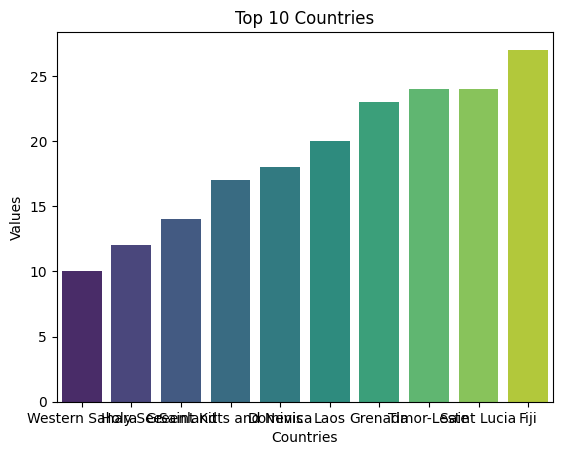

In [29]:
sns.barplot(data=lest_10_country, palette="viridis")
plt.xlabel("Countries")
plt.ylabel("Values")
plt.title("Top 10 Countries")
plt.show()

#### 10 highest covid-19 confirmed country

In [30]:
most_10_country=country_confirmed.tail(10).sort_values(ascending=False)

In [31]:
most_10_country

country
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606
Name: Confirmed, dtype: int64

C:\Users\SIZAN\AppData\Local\Temp\ipykernel_5396\4158764173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_10_country, palette="viridis")


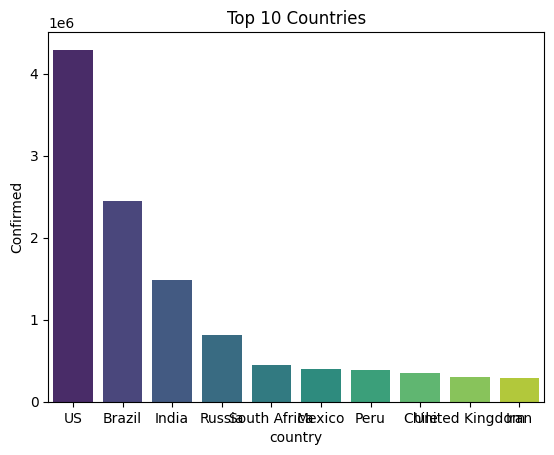

In [32]:
sns.barplot(data=most_10_country, palette="viridis")

plt.title("Top 10 Countries")
plt.show()

##### 20 least Death country in covid-19

In [33]:
counntry_death=country_data.groupby('country')['Deaths'].sum().sort_values(ascending=True)

In [34]:
counntry_death.head(20)

country
Fiji                                0
Holy See                            0
Grenada                             0
Laos                                0
Greenland                           0
Cambodia                            0
Vietnam                             0
Bhutan                              0
Timor-Leste                         0
Mongolia                            0
Dominica                            0
Saint Vincent and the Grenadines    0
Saint Lucia                         0
Papua New Guinea                    0
Eritrea                             0
Saint Kitts and Nevis               0
Seychelles                          0
Western Sahara                      1
Liechtenstein                       1
Burundi                             1
Name: Deaths, dtype: int64

#### Top 10 Death_Country in Covid-19


In [35]:
counntry_death=country_data.groupby('country')['Deaths'].sum().sort_values(ascending=False)

In [36]:
top_10_country_death=counntry_death.head(10)

In [37]:
top_10_country_death

country
US                148011
Brazil             87618
United Kingdom     45844
Mexico             44022
Italy              35112
India              33408
France             30212
Spain              28432
Peru               18418
Iran               15912
Name: Deaths, dtype: int64

C:\Users\SIZAN\AppData\Local\Temp\ipykernel_5396\2899152634.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_country_death,palette="viridis")


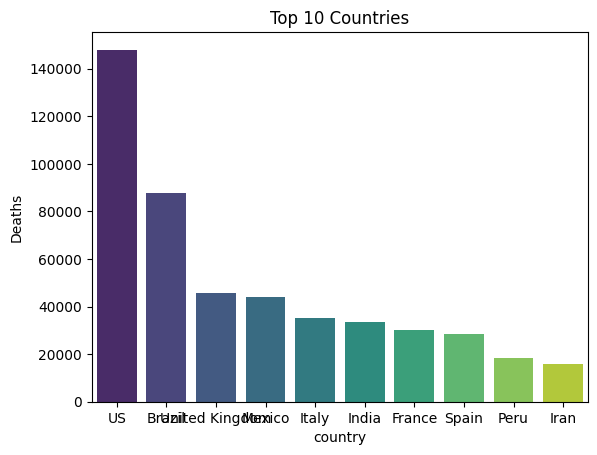

In [38]:
sns.barplot(data=top_10_country_death,palette="viridis")
plt.title("Top 10 Countries")
plt.show()

#####  Least 20 Recovered_Country in covid-19


In [39]:
country_Recovered=country_data.groupby('country')['Recovered'].sum().sort_values(ascending=True)

In [40]:
lest_10_country=country_Recovered.head(20)

C:\Users\SIZAN\AppData\Local\Temp\ipykernel_5396\2560960286.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lest_10_country,palette="viridis")


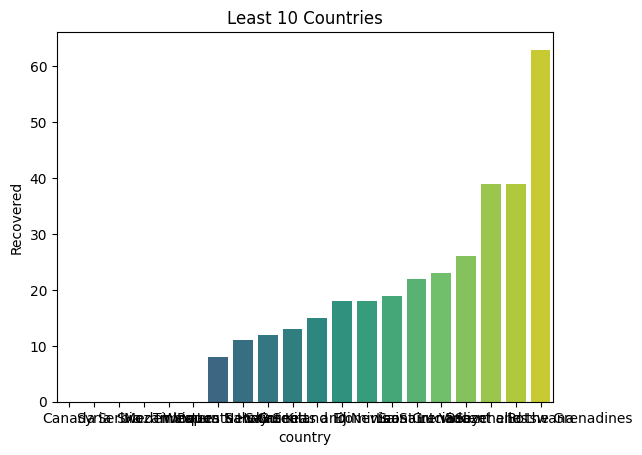

In [41]:
sns.barplot(data=lest_10_country,palette="viridis")
plt.title("Least 10 Countries")
plt.show()

##### 10 most Recovered_Country in covid-19

In [42]:
country_Recovered=country_data.groupby('country')['Recovered'].sum().sort_values(ascending=False)

In [43]:
most_10_country=country_Recovered.head(10)

In [44]:
most_10_country

country
Brazil          1846641
US              1325804
India            951166
Russia           602249
Chile            319954
Mexico           303810
South Africa     274925
Peru             272547
Iran             255144
Pakistan         241026
Name: Recovered, dtype: int64

C:\Users\SIZAN\AppData\Local\Temp\ipykernel_5396\738838641.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_10_country,palette="viridis")


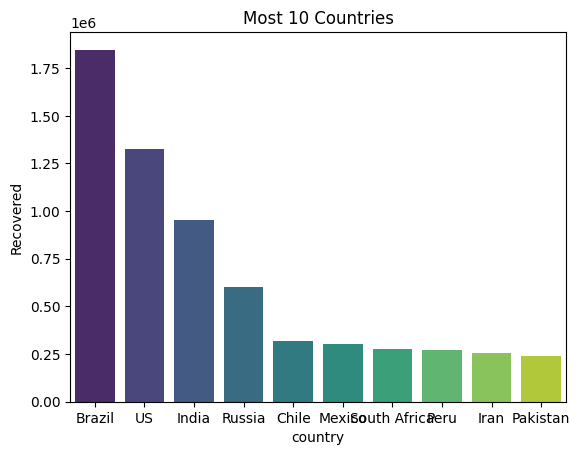

In [45]:
sns.barplot(data=most_10_country,palette="viridis")
plt.title("Most 10 Countries")
plt.show()

In [46]:
correlation_matrix = df[['Confirmed','Deaths','Recovered']].corr()
correlation_matrix

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.934698,0.906377
Deaths,0.934698,1.000000,0.832098
Recovered,0.906377,0.832098,1.000000


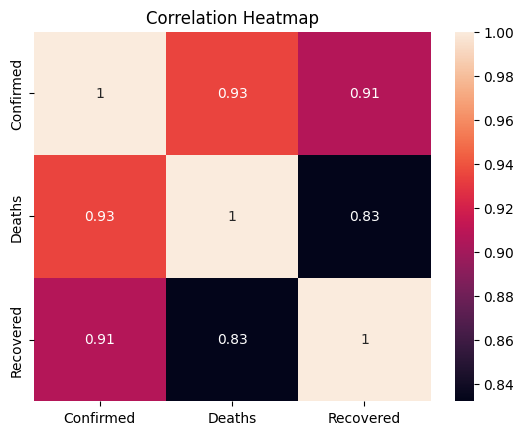

In [47]:
sns.heatmap(data=correlation_matrix,annot=True)
plt.style.use('dark_background')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
df.columns

Index(['country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [49]:
df.rename(columns={'1 week % increase':'increase_rate' }, inplace=True)

In [50]:
df.columns

Index(['country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', 'increase_rate', 'WHO Region'],
      dtype='object')

### Machine Learning


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  increase_rate           187 non-null    float64
 14  WHO Region              187 non-null    ob

#### Data Preprocessing

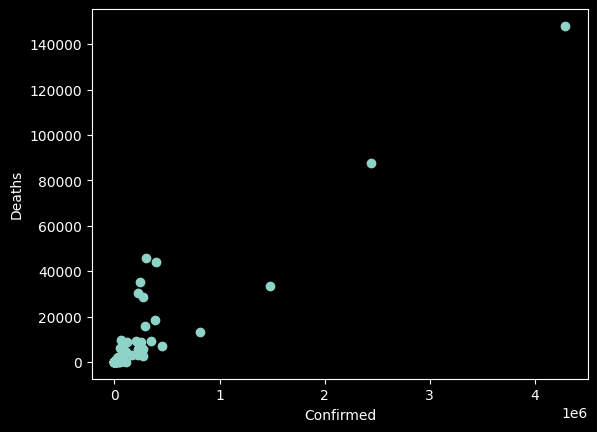

In [52]:
plt.scatter(df["Confirmed"],df['Deaths'] )
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

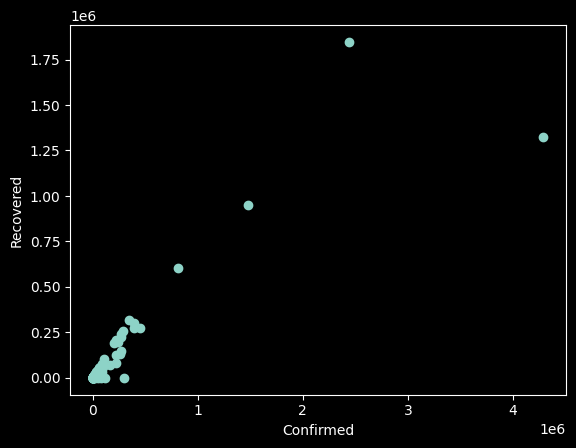

In [53]:
plt.scatter(df["Confirmed"],df['Recovered'] )
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.show()

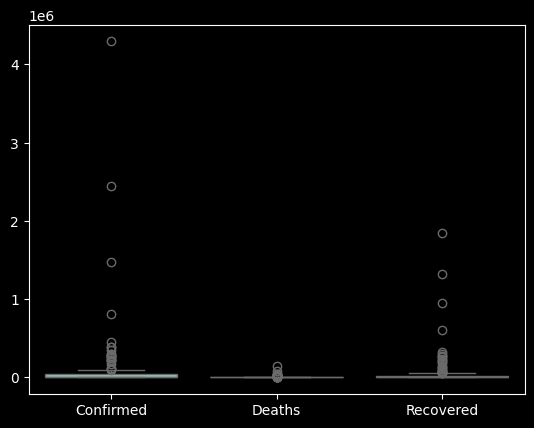

In [54]:
sns.boxplot(data=df[['Confirmed','Deaths','Recovered']])
plt.show()

In [55]:
Q1 = df['Confirmed'].quantile(0.25)
Q3 = df['Confirmed'].quantile(0.75)
IQR = Q3 - Q1

# Set the threshold (1.5 times IQR)
threshold = 1.5

# Identify outliers
outliers = df[(df['Confirmed'] < Q1 - threshold * IQR) | (df['Confirmed'] > Q3 + threshold * IQR)]

# Remove outliers from the original DataFrame
df_cleaned = df[~((df['Confirmed'] < Q1 - threshold * IQR) | (df['Confirmed'] > Q3 + threshold * IQR))]


In [56]:
Q1 = df['Deaths'].quantile(0.25)
Q3 = df['Deaths'].quantile(0.75)
IQR = Q3 - Q1

# Set the threshold (1.5 times IQR)
threshold = 1.5

# Identify outliers
outliers = df[(df['Deaths'] < Q1 - threshold * IQR) | (df['Deaths'] > Q3 + threshold * IQR)]

# Remove outliers from the original DataFrame
df_cleaned = df[~((df['Deaths'] < Q1 - threshold * IQR) | (df['Deaths'] > Q3 + threshold * IQR))]

In [57]:
Q1 = df['Recovered'].quantile(0.25)
Q3 = df['Recovered'].quantile(0.75)
IQR = Q3 - Q1

# Set the threshold (1.5 times IQR)
threshold = 1.5

# Identify outliers
outliers = df[(df['Recovered'] < Q1 - threshold * IQR) | (df['Recovered'] > Q3 + threshold * IQR)]

# Remove outliers from the original DataFrame
df_cleaned = df[~((df['Recovered'] < Q1 - threshold * IQR) | (df['Recovered'] > Q3 + threshold * IQR))]

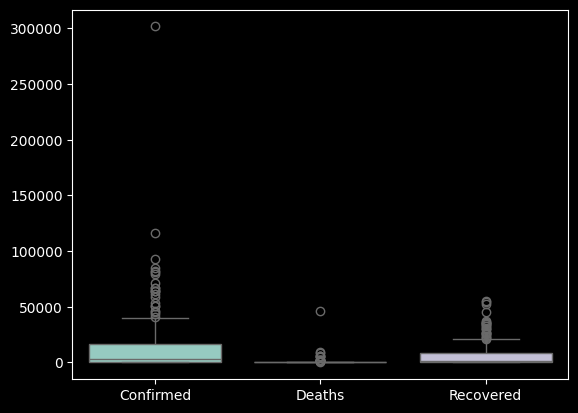

In [58]:
sns.boxplot(data=df_cleaned[['Confirmed','Deaths','Recovered']])
plt.show()

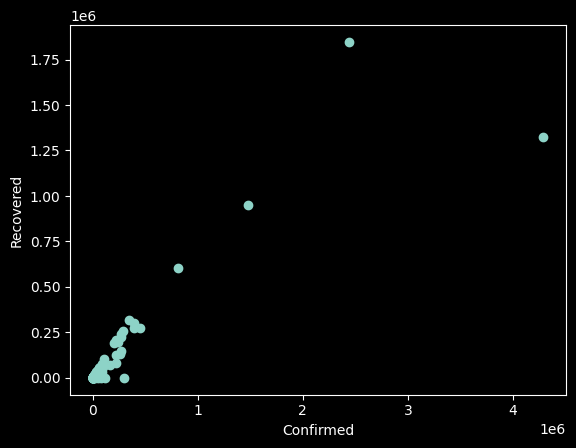

In [59]:
plt.scatter(df["Confirmed"],df['Recovered'] )
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.show()

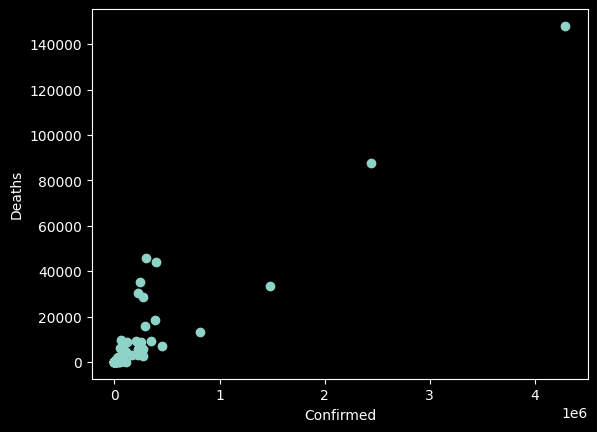

In [60]:
plt.scatter(df["Confirmed"],df['Deaths'] )
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

In [61]:
## Feature enginnering
X=df[['Confirmed','Recovered']]
y=df[['Deaths']]

In [62]:
X.head()

,Confirmed,Recovered
0,36263,25198
1,4880,2745
2,27973,18837
3,907,803
4,950,242


In [63]:
y.head()

,Deaths
0,1269
1,144
2,1163
3,52
4,41


In [67]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale_X=scale.fit_transform(X)
scale_y=scale.fit_transform(y)

In [69]:
scale_X[:5]

array([[0.00845009, 0.01364532],
       [0.00113513, 0.00148648],
       [0.0065178 , 0.01020068],
       [0.00020908, 0.00043484],
       [0.0002191 , 0.00013105]])

##### Model Selection

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(scale_X,scale_y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)



LinearRegression()

In [72]:
y_pred=model.predict(x_test)

In [78]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)


In [76]:
print("mean_absolute_error :",mae)
print("mean_squared_error :",mse)

mean_absolute_error : 0.022254372676486625
mean_squared_error : 0.002871375336430697


Overall, My model seems to be performing well. The low MAE and MSE indicate that it’s making accurate predictions.